In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [2]:
import matplotlib.gridspec as gridspec

In [3]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.size"] = 12

plt.rcParams["font.family"] = "Arial"

In [4]:
import matplotlib.patches as mpatches

In [5]:
reactive_abundant = pd.read_csv(
    "../prc_data/evolution_over_seeds_reactive_new.csv", index_col=0
)

In [6]:
counting_reactive_abundant = pd.read_csv(
    "../prc_data/evolution_over_seeds_reactive_counting.csv", index_col=0
)

In [7]:
dists = []

reactive = []


for type_, variables in zip(
    ["one", "two", "three"],
    [
        ["p_1", "p_2", "frequencies"],
        ["p_1", "p_2", "p_3", "p_4", "frequencies"],
        ["p_1", "p_2", "p_3", "p_4", "p_5", "p_6", "p_7", "p_8", "frequencies"],
    ],
):
    groups = reactive_abundant[
        (reactive_abundant["type"] == type_) & (reactive_abundant["p_1"] > 0.95)
    ].groupby("seed")

    per_seed = []

    for _, group in groups:
        index = group["frequencies"].idxmax()
        per_seed.append(tuple(group[group.index == index][variables].values[0]))

    ps = list(zip(*per_seed))

    reactive.append(ps[:-1])
    
dists.append(reactive)

In [8]:
counting = []
freqs = []
for type_, variables in zip(
    ["counting-two", "counting-three"],
    [
        ["p_1", "p_2", "p_4", "frequencies"],
        ["p_1", "p_2", "p_7", "p_8", "frequencies"],
    ],
):
    groups = counting_reactive_abundant[
        (counting_reactive_abundant["type"] == type_)
        & (counting_reactive_abundant["p_1"] > 0.95)
    ].groupby("seed")

    per_seed = []

    for _, group in groups:
        index = group["frequencies"].idxmax()
        per_seed.append(tuple(group[group.index == index][variables].values[0]))

    ps = list(zip(*per_seed))
    freqs.append(ps[-1])

    counting.append(ps[:-1])

In [9]:
counting.insert(0, reactive[0])

In [10]:
dists.append(counting)

In [11]:
spacing = np.linspace(-0.1, 0.1, 20)

evens = np.arange(1, 17, 1)

In [12]:
colors_dic = {
    "R1": "tab:orange",
    "R2": "tab:green",
    "R3": "tab:blue",
    "R4": "chocolate",
    "R5": "yellowgreen",
    "R6": "dodgerblue",
}

colors = [
    "tab:orange",
    "tab:green",
    "tab:blue",
    "chocolate",
    "yellowgreen",
    "dodgerblue",
]

linestyles = ["-o", "--o", ":o"]

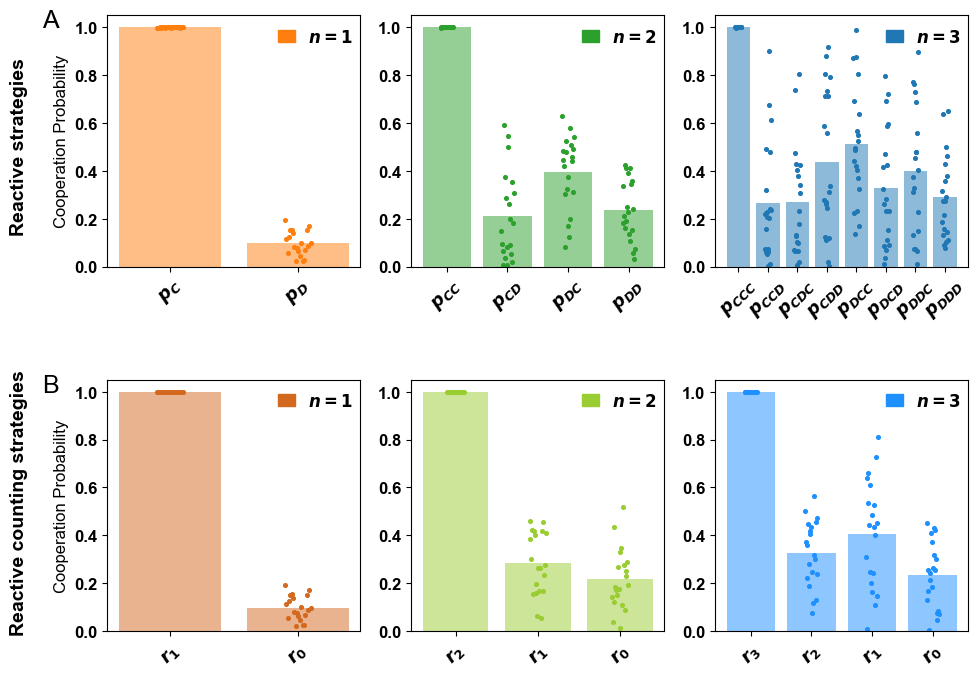

In [20]:
fig = plt.figure(figsize=(25, 8))

outer = gridspec.GridSpec(2, 2, wspace=0.25, hspace=0.45)

count = 0

for i, plot in enumerate([0, 2]):
    inner = gridspec.GridSpecFromSubplotSpec(
        1, 3, subplot_spec=outer[plot], wspace=0.2, hspace=0.1
    )

    for j, dist in enumerate(dists[i]):
        averages = np.mean(dist, axis=1)
        ax = plt.Subplot(fig, inner[j])

        for l, data in enumerate(dist):
            for l2, point in enumerate(data):
                _ = ax.scatter(
                    0 + evens[l] + spacing[l2],
                    point,
                    color=colors_dic[f"R{j + 1 + (i * 3)}"],
                    s=7,
                    zorder=2,
                )
            _ = ax.bar(
                evens[l],
                averages[l],
                color=colors_dic[f"R{j + 1 + (i * 3)}"],
                alpha=0.5,
            )

        label = [
            (
                mpatches.Patch(color=colors_dic[f"R{j + 1 + (i * 3)}"]),
                f"$n={(j % 3) + 1}$",
            )
        ]

        ax.legend(
            *zip(*label),
            bbox_to_anchor=(1.03, 1.01),
            handlelength=1,
            fontsize=12,
            frameon=False,
        )

        if (j + (i * 3)) == 0:
            ax.set_ylabel("Cooperation Probability", fontweight="normal")
            ax.text(0, 1, "A", fontsize=18, fontweight="normal")
            ax.text(-.25, 0.15,
               "Reactive strategies",
               rotation=90, fontsize=14,
               fontweight='bold')

            ax.set_xticks([1, 2])
            ax.set_xticklabels(["$p_C$", "$p_D$"], rotation=45, fontsize=13)
        if (j + (i * 3)) == 1:
            ax.set_xticks([1, 2, 3, 4])
            ax.set_xticklabels(
                ["$p_{CC}$", "$p_{CD}$", "$p_{DC}$", "$p_{DD}$"],
                rotation=45,
                fontsize=13,
            )
        if (j + (i * 3)) == 2:
            ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8])
            ax.set_xticklabels(
                [
                    "$p_{CCC}$",
                    "$p_{CCD}$",
                    "$p_{CDC}$",
                    "$p_{CDD}$",
                    "$p_{DCC}$",
                    "$p_{DCD}$",
                    "$p_{DDC}$",
                    "$p_{DDD}$",
                ],
                rotation=45,
                fontsize=13,
            )

        if (j + (i * 3)) == 3:
            ax.set_ylabel("Cooperation Probability", fontweight="normal")
            ax.set_xticks([1, 2])
            ax.set_xticklabels(["$r_1$", "$r_0$"], rotation=45, fontsize=13)
            ax.text(0, 1, "B", fontsize=18, fontweight="normal")
            ax.text(-.25, 0,
               "Reactive counting strategies",
               rotation=90, fontsize=14,
               fontweight='bold')

        if (j + (i * 3)) == 4:
            ax.set_xticks([1, 2, 3])
            ax.set_xticklabels(
                ["$r_2$", "$r_1$", "$r_0$"], rotation=45, fontsize=13
            )
        if (j + (i * 3)) == 5:
            ax.set_xticks(
                [
                    1,
                    2,
                    3,
                    4,
                ]
            )
            ax.set_xticklabels(
                [
                    "$r_3$",
                    "$r_2$",
                    "$r_1$",
                    "$r_0$",
                ],
                rotation=45,
                fontsize=13,
            )

        fig.add_subplot(ax)


fig.savefig("../figures/siFig3AbundantStrategies.pdf", bbox_inches="tight")